<a href="https://colab.research.google.com/github/Crypto-28/Python-Basic/blob/master/Python_Portfolio_Optimizer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#description: This program attempts to optimize a user's portfolio using the Effifcient Frontier

#Import the python libararies
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")



/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
# Get the stock symbols/tickers in the portfolio
# FAANG
assets=['FB','AMZN','AAPL','NFLX','GOOG']



In [0]:
# Assign weights to stocks

weights = np.array([0.2,0.2,0.2,0.2,0.2])



In [0]:
# Get the stocks/portfoiio start date

stocks_start_date = "2013-01-01"

In [0]:
# Get the stocks/portfoiio end date (today)

today = datetime.today().strftime('%Y-%m-%d')
today 

'2020-05-24'

In [0]:
# Create a dataframe to store adjusted close price of the stocks
df = pd.DataFrame()

# Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock]=web.DataReader(stock, data_source='yahoo',start=stocks_start_date,end=today)['Adj Close']

In [0]:
# Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823
...,...,...,...,...,...
2020-05-18,213.190002,2426.260010,314.959991,452.579987,1383.939941
2020-05-19,216.880005,2449.330078,313.140015,451.040009,1373.484985
2020-05-20,229.970001,2497.939941,319.230011,447.670013,1406.719971


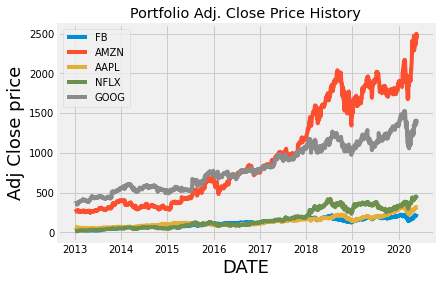

In [0]:
# Visually show the stock / portfolo
Title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label = c)

plt.title(Title) 
plt.xlabel('DATE',fontsize =18)
plt.ylabel('Adj Close price', fontsize =18) 
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [0]:
#Show the daily simple return
returns=df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-05-18,0.010954,0.006839,0.023561,-0.003545,0.007828
2020-05-19,0.017309,0.009508,-0.005778,-0.003403,-0.007554
2020-05-20,0.060356,0.019846,0.019448,-0.007472,0.024198


In [0]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.116141,0.051831,0.040554,0.053781,0.048516
AMZN,0.051831,0.091878,0.035488,0.061062,0.046496
AAPL,0.040554,0.035488,0.076456,0.031641,0.037204
NFLX,0.053781,0.061062,0.031641,0.213453,0.048677
GOOG,0.048516,0.046496,0.037204,0.048677,0.064885


In [0]:
# Calculate the portfolio variance

port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_variance

0.058932504155951825

In [0]:
# Calculate the portfolio volatilty aka standard deviation
port_volatilty  =np.sqrt(port_variance)
port_volatilty


0.24276017827467467

In [0]:
# Calculate the annual portfolio return
portfolioSimpleAnuualReturn=np.sum(returns.mean()*weights) * 252
portfolioSimpleAnuualReturn

0.3471242706498469

In [0]:
# Show the expected annual return, volatilty & variance

percent_var=str(round(port_variance,2)*100) + "%"
percent_vols=str(round(port_volatilty,2)*100) + "%"
percent_ret=str(round(portfolioSimpleAnuualReturn,2)*100) + "%"

print("Expected annual return:" + percent_ret)
print("Annual Volatility:" + percent_vols)
print('Annual Variance:' + percent_var)

Expected annual return:35.0%
Annual Volatility:24.0%
Annual Variance:6.0%


In [0]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 10.4MB 6.4MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
  Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3


In [0]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [0]:
# Portfolio Optimization

#Calculate the expected returns & annulized sample covariance martix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)




In [0]:
# Optimize for max sharpe ratio

ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)



{'FB': 0.18256, 'AMZN': 0.27945, 'AAPL': 0.19753, 'NFLX': 0.34046, 'GOOG': 0.0}
Expected annual return: 40.6%
Annual volatility: 27.1%
Sharpe Ratio: 1.42


(0.40575292998264956, 0.27103832687702195, 1.4232412604792863)

In [0]:
# Get the discrete allocation of each share or stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weight = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value= 1000000)
allocation, leftover = da.lp_portfolio()

print('Discrete allocation', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation {'FB': 777.0, 'AMZN': 115.0, 'AAPL': 617.0, 'NFLX': 793.0}
Funds remaining: $27.84


SyntaxError: ignored